Chennai House Price Prediction

Problem Statement
Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor



In [2]:
df = pd.read_csv("train-chennai-sale.csv")
df.head()
df.shape

(7109, 22)

In [3]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [4]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [5]:
df['N_BEDROOM']=df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0])
df['N_BATHROOM']=df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0])
df['QS_OVERALL']=df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean())

In [6]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [7]:
df.columns = df.columns
df.head(3)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200


In [8]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [9]:
df.AREA = df.AREA.replace({'Karapakam':'Karapakkam',  
                         'Ana Nagar' :'Anna Nagar',
                         'Ann Nagar' : 'Anna Nagar',
                         'Adyr': 'Adyar',
                         'Chormpet':'Chrompet',
                         'Chrmpet' : 'Chrompet',
                         'Chormpet': 'Chrompet',
                         'Chrompt' : 'Chrompet',
                         'Velchery': 'Velachery',
                         'KKNagar' :'KK Nagar',
                         'TNagar' : 'T Nagar'
                         }) # Correcting the spelling mistakes in area columns
df.AREA.unique()


array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [10]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [11]:
df.SALE_COND = df.SALE_COND.replace({'Adj Land':'AdjLand', 
                       'Partiall':'Partial',
                        'PartiaLl': 'Partial',
                       'Ab Normal':'AbNormal'}) # Correcting the spelling mistakes in sale_cond columns
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [12]:
df.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [13]:
df.PARK_FACIL = df.PARK_FACIL.replace({'Noo':'No'})
df.PARK_FACIL.unique()

array(['Yes', 'No'], dtype=object)

In [14]:
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [15]:
df.BUILDTYPE = df.BUILDTYPE.replace({'Comercial':'Commercial','Others':'Other'})
df.BUILDTYPE.unique()

array(['Commercial', 'Other', 'House'], dtype=object)

In [16]:
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [17]:
df.UTILITY_AVAIL = df.UTILITY_AVAIL.replace({'NoSeWa':'NoSewr','NoSewr ':'NoSewr','All Pub':'AllPub'})
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr'], dtype=object)

In [18]:
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [19]:
df.STREET = df.STREET.replace({'NoAccess':'No Access','Pavd':'Paved'}) 
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [20]:
df.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   float64
 6   N_BATHROOM     7109 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [22]:
df.N_BEDROOM = df.N_BEDROOM.astype(int) # Fixing the correct Data Type of columns
df.N_BATHROOM = df.N_BATHROOM.astype(int)

In [23]:
# Correcting Date column from object to datetime format
df.DATE_SALE = pd.to_datetime(df.DATE_SALE, format = '%d-%m-%Y')
df.DATE_BUILD = pd.to_datetime(df.DATE_BUILD, format = '%d-%m-%Y')

In [24]:
df.dtypes

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int32
N_BATHROOM                int32
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
dtype: object

In [25]:
df = df.drop_duplicates()

In [26]:
del df['PRT_ID']
del df['REG_FEE']
del df['COMMIS']


In [27]:

df['PROPERTY_AGE'] = df.DATE_SALE.dt.year - df.DATE_BUILD.dt.year # Creating property_age column which deternine how old the property age

In [28]:
del df['DATE_SALE']
del df['DATE_BUILD']

In [29]:
df.PROPERTY_AGE

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: PROPERTY_AGE, Length: 7109, dtype: int64

In [30]:
df.head(3)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,PROPERTY_AGE
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20


# Distribution Of Feature

<AxesSubplot:xlabel='PROPERTY_AGE', ylabel='Count'>

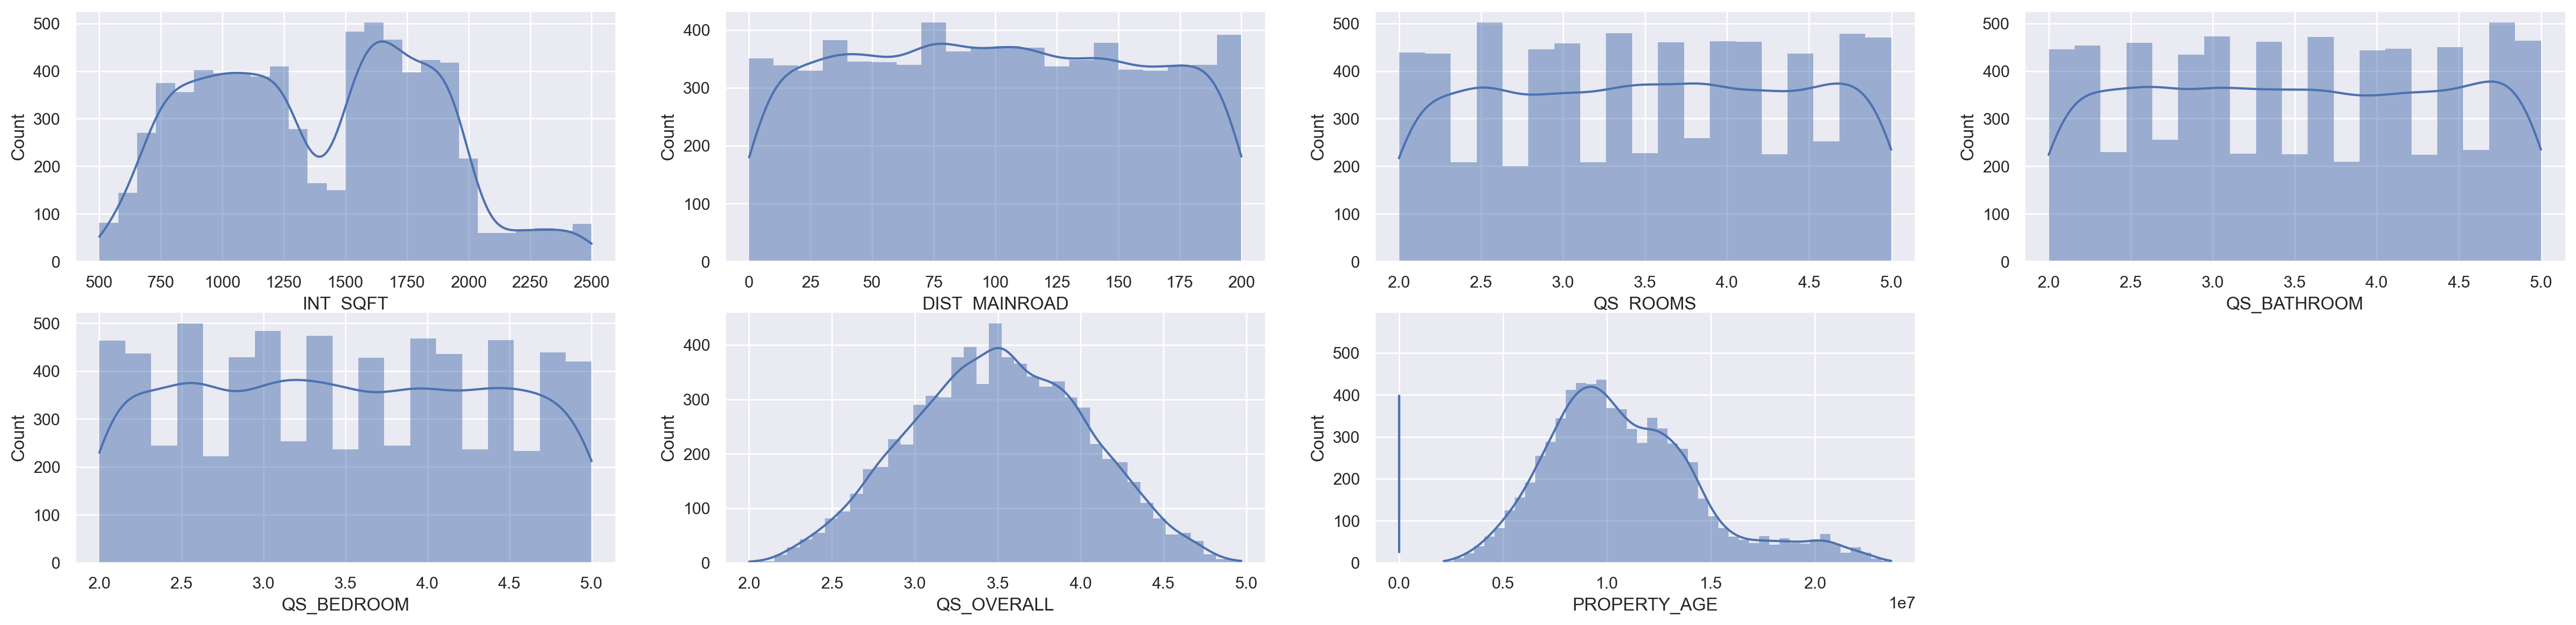

In [31]:
plt.figure(figsize=(30,18), dpi=200)

plt.subplot(5,4,1)
sns.histplot(df.INT_SQFT, linewidth=0, kde=True)

plt.subplot(5,4,2)
sns.histplot(df.DIST_MAINROAD, linewidth=0, kde=True)

plt.subplot(5,4,3)
sns.histplot(df.QS_ROOMS, linewidth=0, kde=True)

plt.subplot(5,4,4)
sns.histplot(df.QS_BATHROOM, linewidth=0, kde=True)


plt.subplot(5,4,5)
sns.histplot(df.QS_BEDROOM, linewidth=0, kde=True)

plt.subplot(5,4,6)
sns.histplot(df.QS_OVERALL, linewidth=0, kde=True)

plt.subplot(5,4,7)
sns.histplot(df.PROPERTY_AGE, linewidth=0, kde=True)

plt.subplot(5,4,7)
sns.histplot(df.SALES_PRICE, linewidth=0, kde=True)




In [32]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'PROPERTY_AGE'],
      dtype='object')

Plotting Categorical VS Target Column

<AxesSubplot:xlabel='N_ROOM', ylabel='SALES_PRICE'>

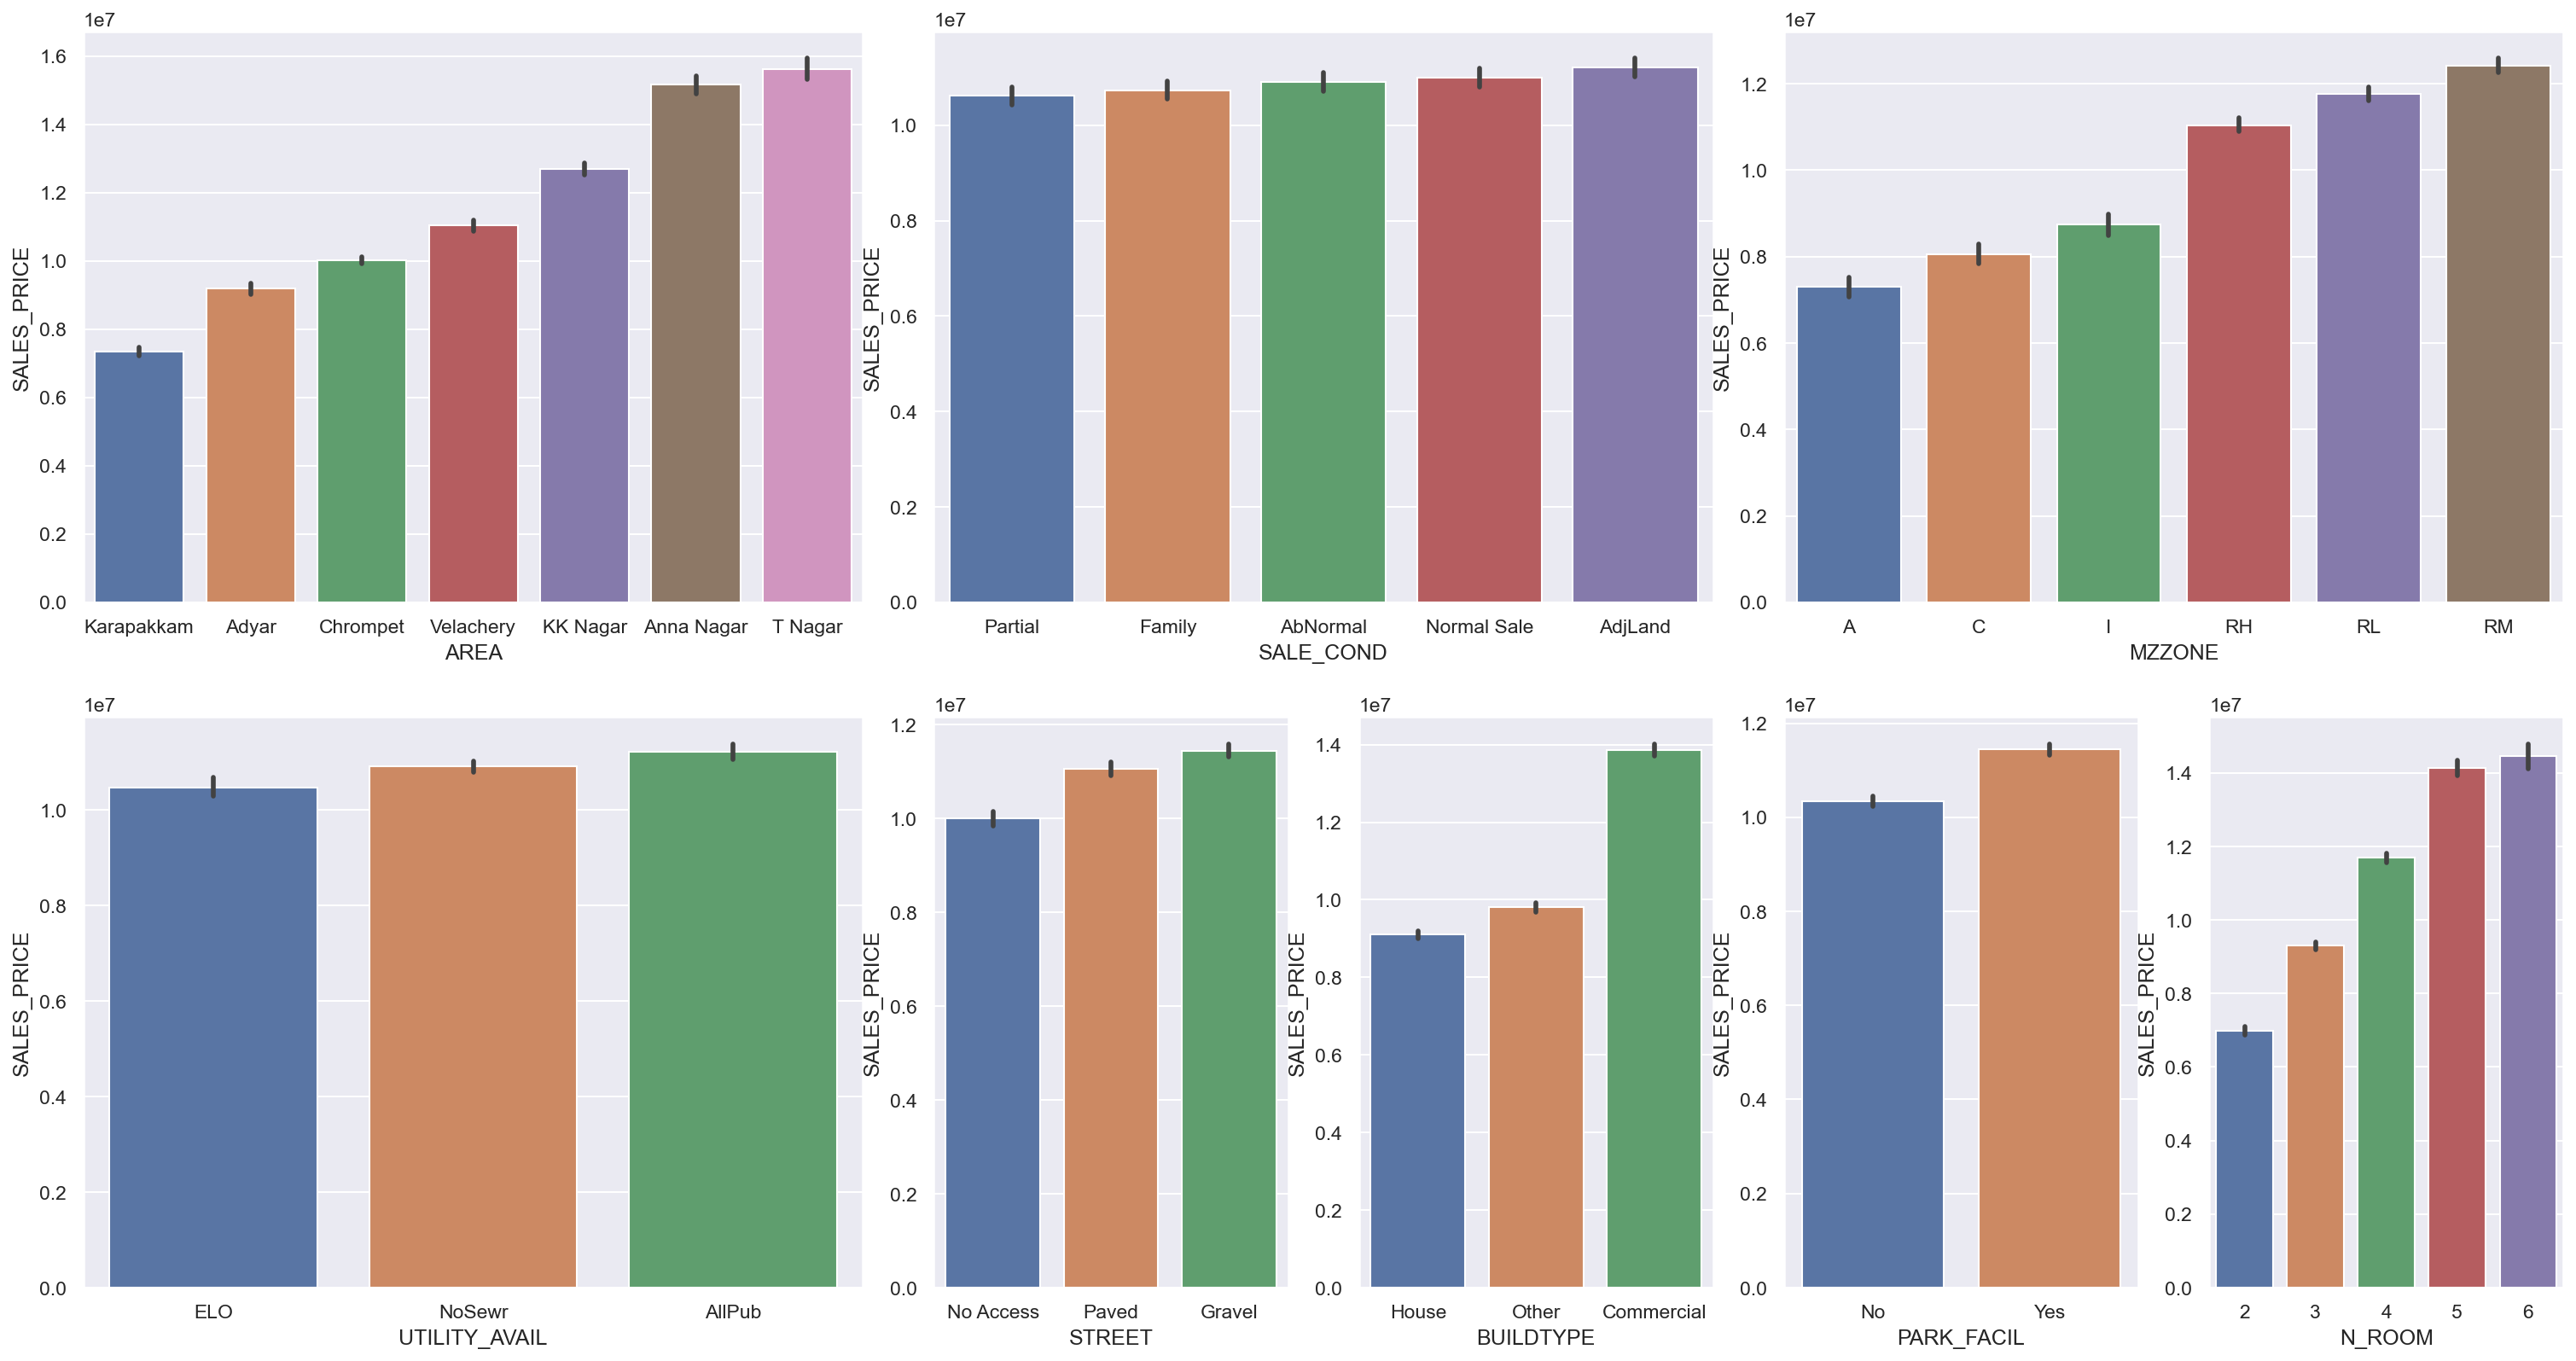

In [33]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2,6),(0,0),colspan=2)
sns.barplot(x=df.AREA,y=df.SALES_PRICE,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])

plt.subplot2grid((2,6),(0,2),colspan=2)
sns.barplot(x=df.SALE_COND,y=df.SALES_PRICE,order=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])

plt.subplot2grid((2,6),(0,4),colspan=2)
sns.barplot(x=df.MZZONE,y=df.SALES_PRICE,order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])

plt.subplot2grid((2,6),(1,0),colspan=2)
sns.barplot(x=df.UTILITY_AVAIL,y=df.SALES_PRICE,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])

plt.subplot2grid((2,6),(1,2))
sns.barplot(x=df.STREET,y=df.SALES_PRICE,order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])

plt.subplot2grid((2,6),(1,3))
sns.barplot(x=df.BUILDTYPE,y=df.SALES_PRICE,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])

plt.subplot2grid((2,6),(1,4))
sns.barplot(x=df.PARK_FACIL,y=df.SALES_PRICE,order=df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])

plt.subplot2grid((2,6),(1,5))
sns.barplot(x=df.N_ROOM,y=df.SALES_PRICE,order=df.groupby('N_ROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_ROOM'])

Interpretation:-

Here we can come to conclusion that:

- In area we find good relation it will be important for us so we will keep it
- In sale_cond we find good relation it will be important for us so we will keep it
- In mzzone we find good relation it will be important for us so we will keep it
- In utility_avail we find good relation it will be important for us so we will keep it
- In buildtype we didn't find linear relation in this it may be important for us so we will keep it
- In street we find good relation it will be important for us so we will keep it
- In park_facil we find good relation it will be important for us so we will keep it.

# Feature vs Target plot


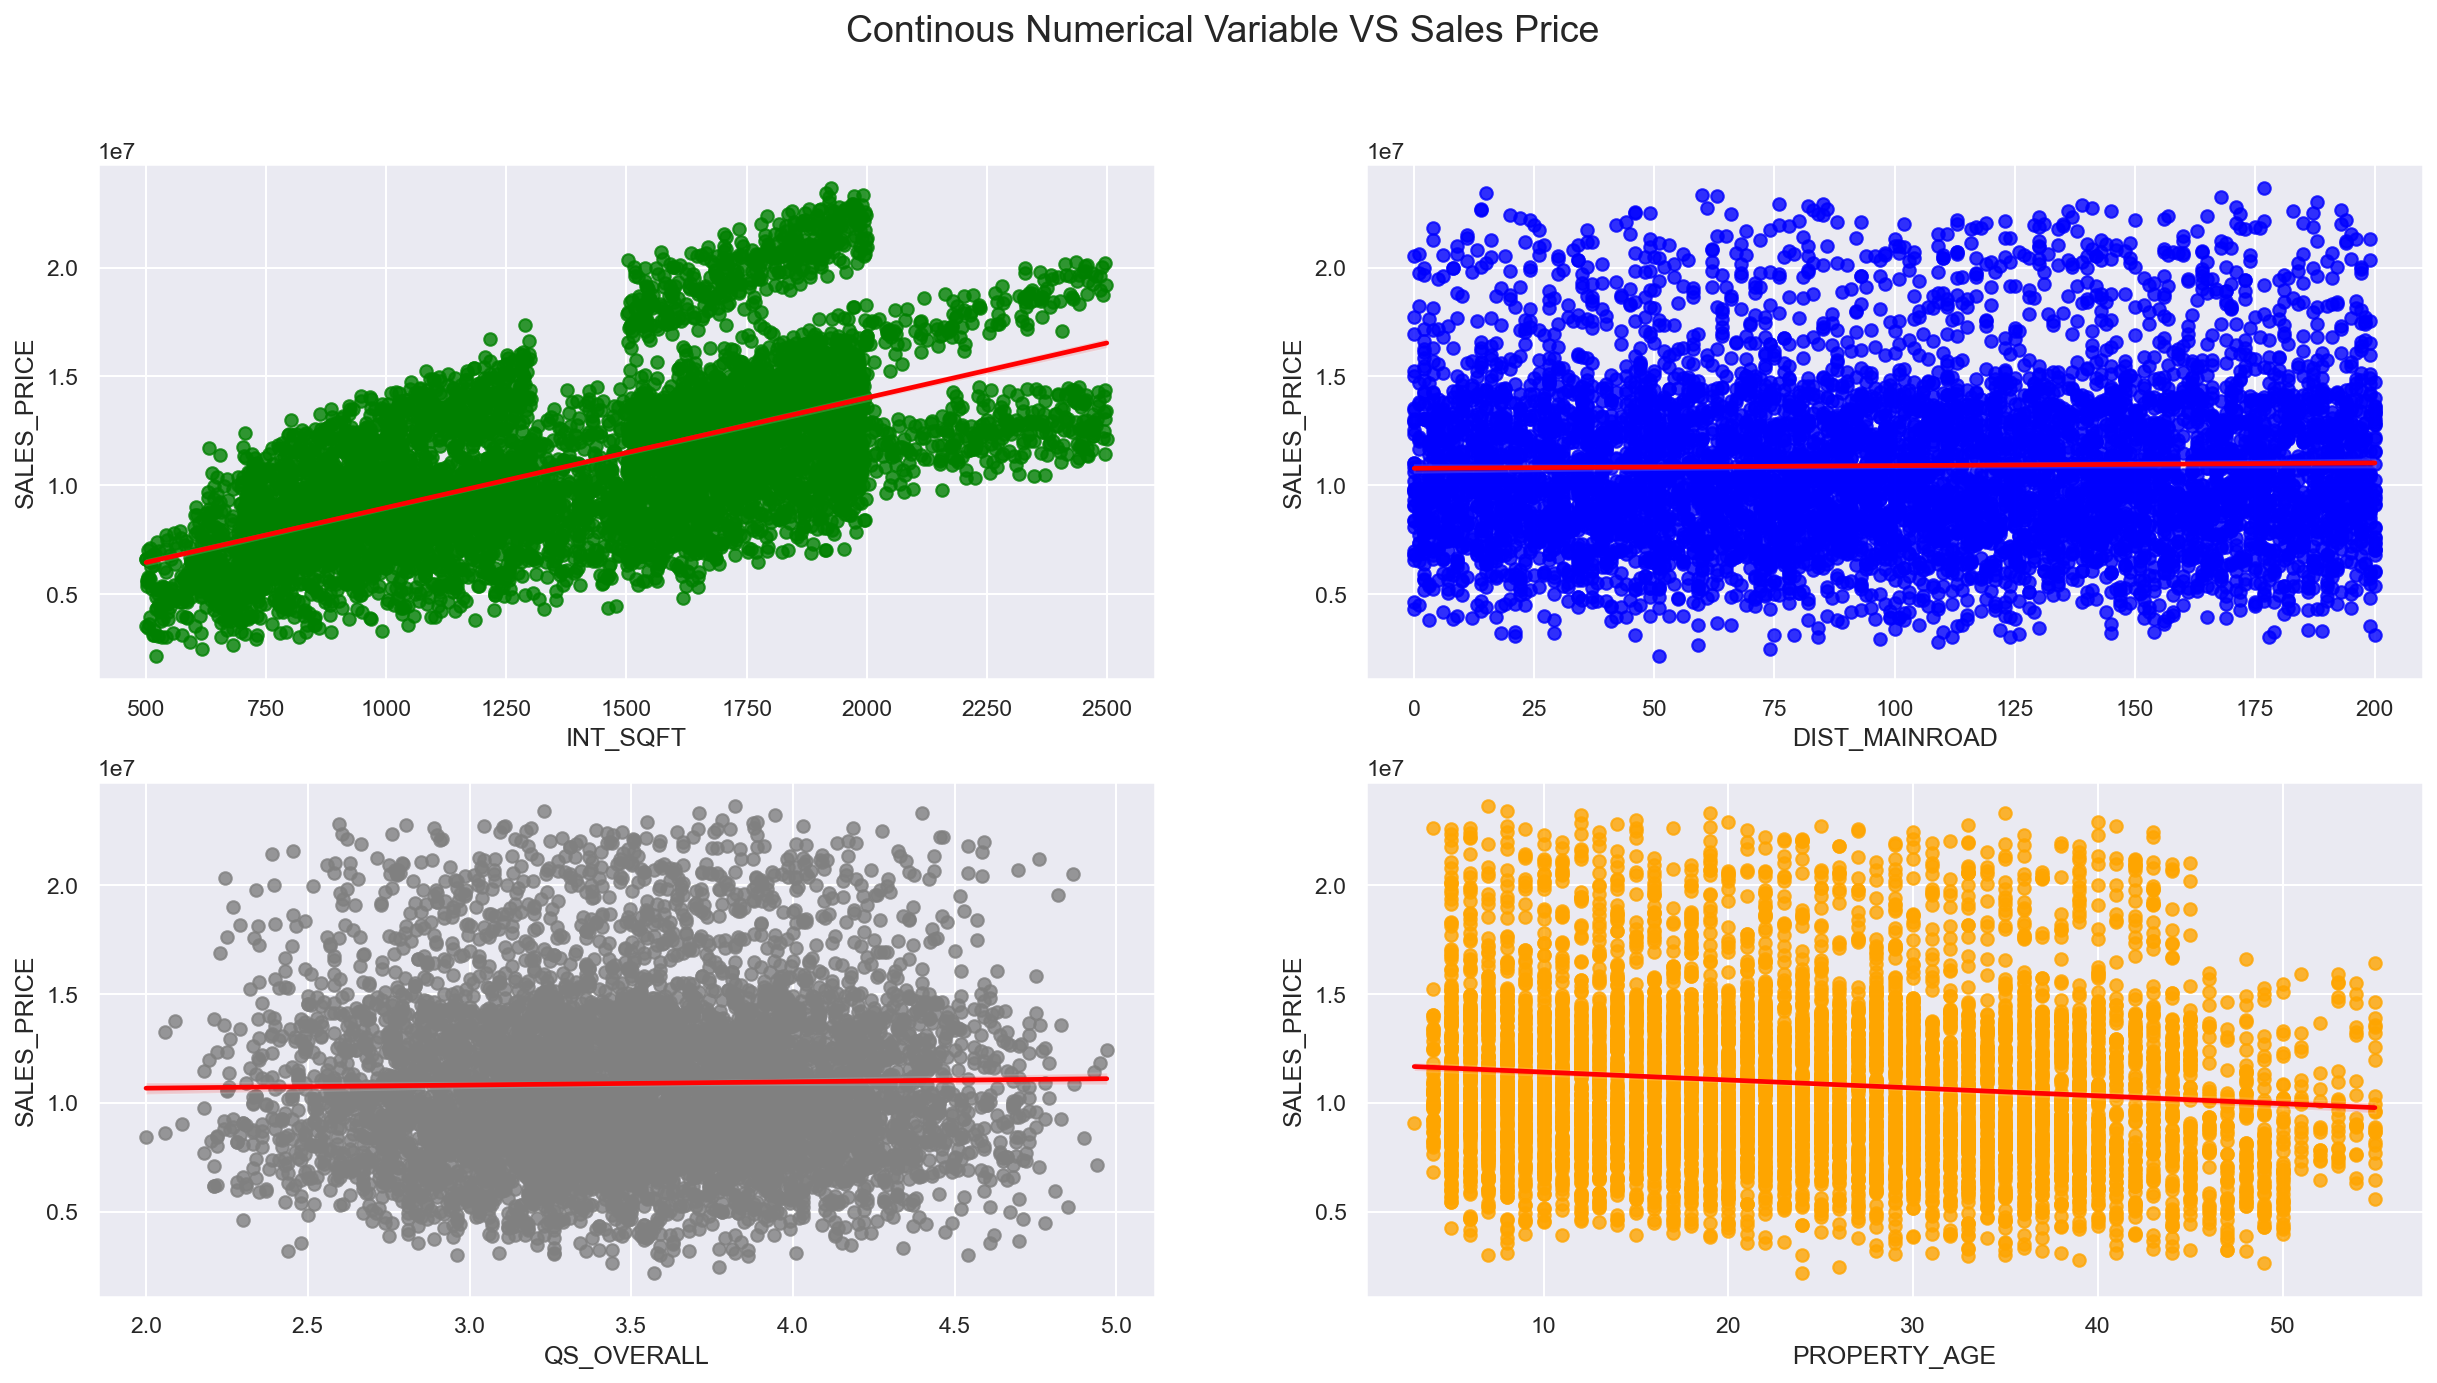

In [34]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,2,1)
sns.regplot(df.INT_SQFT, df.SALES_PRICE, scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.subplot(2,2,2)
sns.regplot(df.DIST_MAINROAD, df.SALES_PRICE, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot(2,2,3)
sns.regplot(df.QS_OVERALL, df.SALES_PRICE, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot(2,2,4)
sns.regplot(df.PROPERTY_AGE, df.SALES_PRICE, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.suptitle("Continous Numerical Variable VS Sales Price", fontsize=18)
plt.show()

Interpretation:-

Here we can come to conclusion that:

- In int_sqft we find good relation so this feature will be very important for us so we will keep it.
- In dist_mainroad we didn't find any relation so this feature will be of no use or very less use for us so we will drop it.
- In qs_overall we didn't find any relation so this feature will be of no use or very less use for us so we will drop it.
- In property_age we find small relation so this feature will be useful for use so we will keep it.

In [35]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'PROPERTY_AGE'],
      dtype='object')

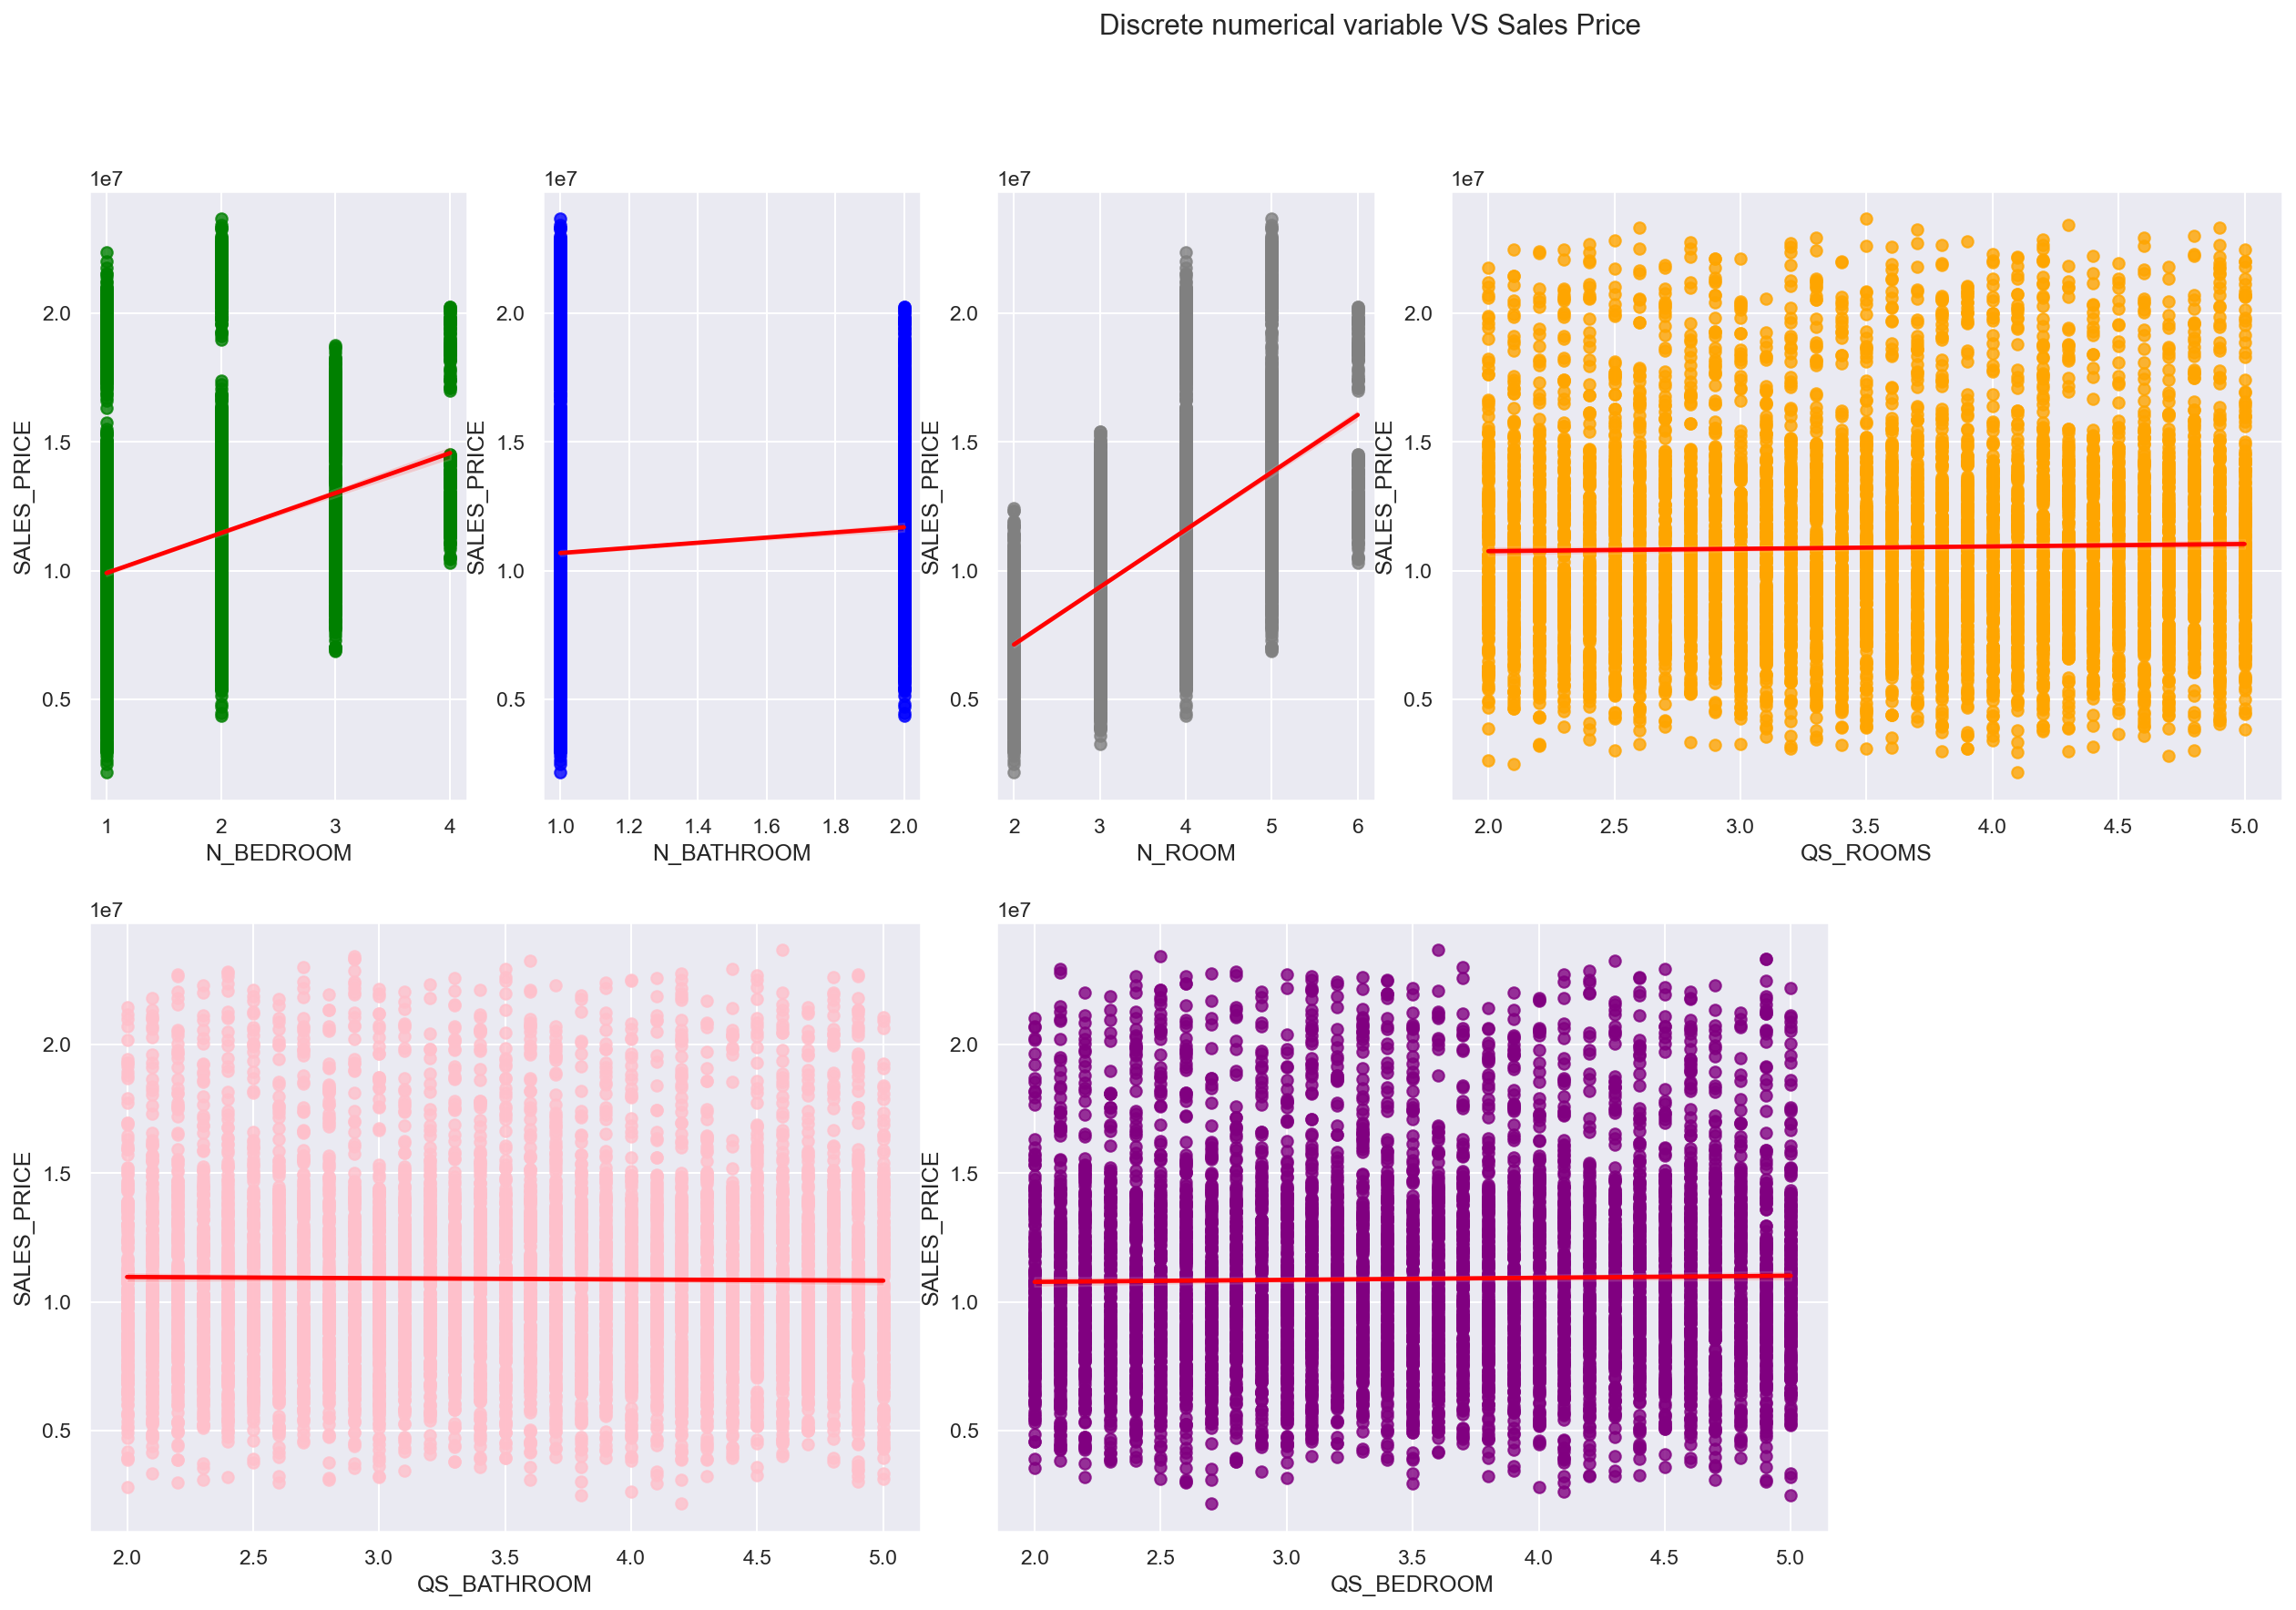

In [36]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2,6),(0,0))
sns.regplot(df.N_BEDROOM, df.SALES_PRICE, scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,1))
sns.regplot(df.N_BATHROOM, df.SALES_PRICE, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,2))
sns.regplot(df.N_ROOM, df.SALES_PRICE, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,3), colspan=2)
sns.regplot(df.QS_ROOMS, df.SALES_PRICE, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(1,0), colspan=2)
sns.regplot(df.QS_BATHROOM, df.SALES_PRICE, scatter_kws={"color": "pink"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(1,2), colspan=2)
sns.regplot(df.QS_BEDROOM, df.SALES_PRICE, scatter_kws={"color": "purple"}, line_kws={"color": "red"})


plt.suptitle("Discrete numerical variable VS Sales Price", fontsize=15)
plt.show()

Interpretation:-

- In n_bedroom we find good relation so this feature will be very important for us so we will keep it.
- In n_bathroom we find small relation so this feature will be useful for use so we will keep it.
- In n_room we find good relation so this feature will be very important for use so we will keep it.
- In qs_rooms we didn't find any relation so this feature will be of no use or very less use for us so we will drop it.
- In qs_bathroom we didn't find any relation so this feature will be of no use or very less use for us so we will drop it.
- In qs_bedroom we didn't find any relation so this feature will be of no use or very less use for us so we will drop it.



# Encoding

# Label Encoder (Mapping)

In [37]:
df.AREA = df.AREA.map({'Karapakkam' : 1, 'Anna Nagar':2, 'Adyar':3, 'Velachery':4, 'Chrompet':5,
       'KK Nagar':6, 'T Nagar':6
})

df.SALE_COND = df.SALE_COND.map({'AbNormal':1, 'Family':2, 'Partial':3, 'AdjLand':4, 'Normal Sale':5})

df.PARK_FACIL = df.PARK_FACIL.map({'Yes':1, 'No':0})

df.UTILITY_AVAIL = df.UTILITY_AVAIL.map({'AllPub':1, 'ELO':2, 'NoSewr':3, 'NoSeWa':4})

df.STREET = df.STREET.map({'Paved':1, 'Gravel':2, 'No Access':3})

df.MZZONE = df.MZZONE.map({'A':1, 'RH':2, 'RL':3, 'I':4, 'C':5, 'RM':6})



In [38]:
df.head(3)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,PROPERTY_AGE
0,1,1004,131,1,1,3,1,1,Commercial,1,1,1,4.0,3.9,4.9,4.330,7600000,44
1,2,1986,26,2,1,5,1,0,Commercial,1,2,2,4.9,4.2,2.5,3.765,21717770,11
2,3,909,70,1,1,3,1,1,Commercial,2,2,3,4.1,3.8,2.2,3.090,13159200,20


# OneHotEncoder

In [39]:
df = pd.get_dummies(df,columns=['BUILDTYPE'])

In [40]:
df.head(5)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,PROPERTY_AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Other
0,1,1004,131,1,1,3,1,1,1,1,1,4.0,3.9,4.9,4.330,7600000,44,1,0,0
1,2,1986,26,2,1,5,1,0,1,2,2,4.9,4.2,2.5,3.765,21717770,11,1,0,0
2,3,909,70,1,1,3,1,1,2,2,3,4.1,3.8,2.2,3.090,13159200,20,1,0,0
3,4,1855,14,3,2,5,2,0,3,1,4,4.7,3.9,3.6,4.010,9630290,22,0,0,1
4,1,1226,84,1,1,3,1,1,1,2,5,3.0,2.5,4.1,3.290,7406250,30,0,0,1


In [41]:
df.corr()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,PROPERTY_AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Other
AREA,1.000000,0.280628,-0.007065,0.330825,0.030796,0.317567,-0.001876,0.005882,0.026372,-0.125691,0.041656,0.011409,0.016981,0.004578,0.018430,0.328190,-0.195725,0.014070,-0.011792,-0.002135
INT_SQFT,0.280628,1.000000,0.002022,0.786263,0.515290,0.951279,0.011033,0.004618,0.014694,-0.100106,0.022562,0.019850,-0.008337,0.008865,0.013989,0.612125,-0.012610,0.008927,-0.006848,-0.001995
DIST_MAINROAD,-0.007065,0.002022,1.000000,-0.002723,0.001850,0.002301,-0.005010,-0.009448,0.003075,-0.013666,-0.004734,0.002237,-0.029468,0.001554,-0.017255,0.018783,-0.003559,0.022109,-0.019417,-0.002458
N_BEDROOM,0.330825,0.786263,-0.002723,1.000000,0.755207,0.840209,0.016723,-0.009357,0.018621,-0.120624,0.018387,0.014948,-0.007534,0.015752,0.014245,0.330987,-0.045873,-0.000534,0.004914,-0.004435
N_BATHROOM,0.030796,0.515290,0.001850,0.755207,1.000000,0.568541,0.012457,-0.014033,0.020080,-0.061310,0.015582,0.013376,-0.012043,0.013191,0.007961,0.108834,-0.020403,-0.006099,0.018195,-0.012305
N_ROOM,0.317567,0.951279,0.002301,0.840209,0.568541,1.000000,0.010721,-0.000934,0.016157,-0.089727,0.030272,0.016524,-0.007545,0.015072,0.015418,0.602760,-0.033316,0.008826,-0.005288,-0.003472
SALE_COND,-0.001876,0.011033,-0.005010,0.016723,0.012457,0.010721,1.000000,-0.009020,0.009585,0.000334,-0.000368,-0.003747,-0.009856,-0.002640,-0.006546,0.023834,0.002685,-0.001201,0.007208,-0.006090
PARK_FACIL,0.005882,0.004618,-0.009448,-0.009357,-0.014033,-0.000934,-0.009020,1.000000,0.004047,-0.007024,-0.013739,-0.008128,-0.011935,-0.001165,-0.009601,0.146428,-0.009010,0.010702,-0.010172,-0.000407
UTILITY_AVAIL,0.026372,0.014694,0.003075,0.018621,0.020080,0.016157,0.009585,0.004047,1.000000,-0.027651,0.013043,0.007509,0.005364,0.008394,0.010707,-0.023812,-0.000200,-0.016225,0.006526,0.009613
STREET,-0.125691,-0.100106,-0.013666,-0.120624,-0.061310,-0.089727,0.000334,-0.007024,-0.027651,1.000000,0.010164,-0.016667,-0.016455,-0.004294,-0.021383,-0.103718,0.034807,-0.012059,0.016964,-0.005104


<AxesSubplot:>

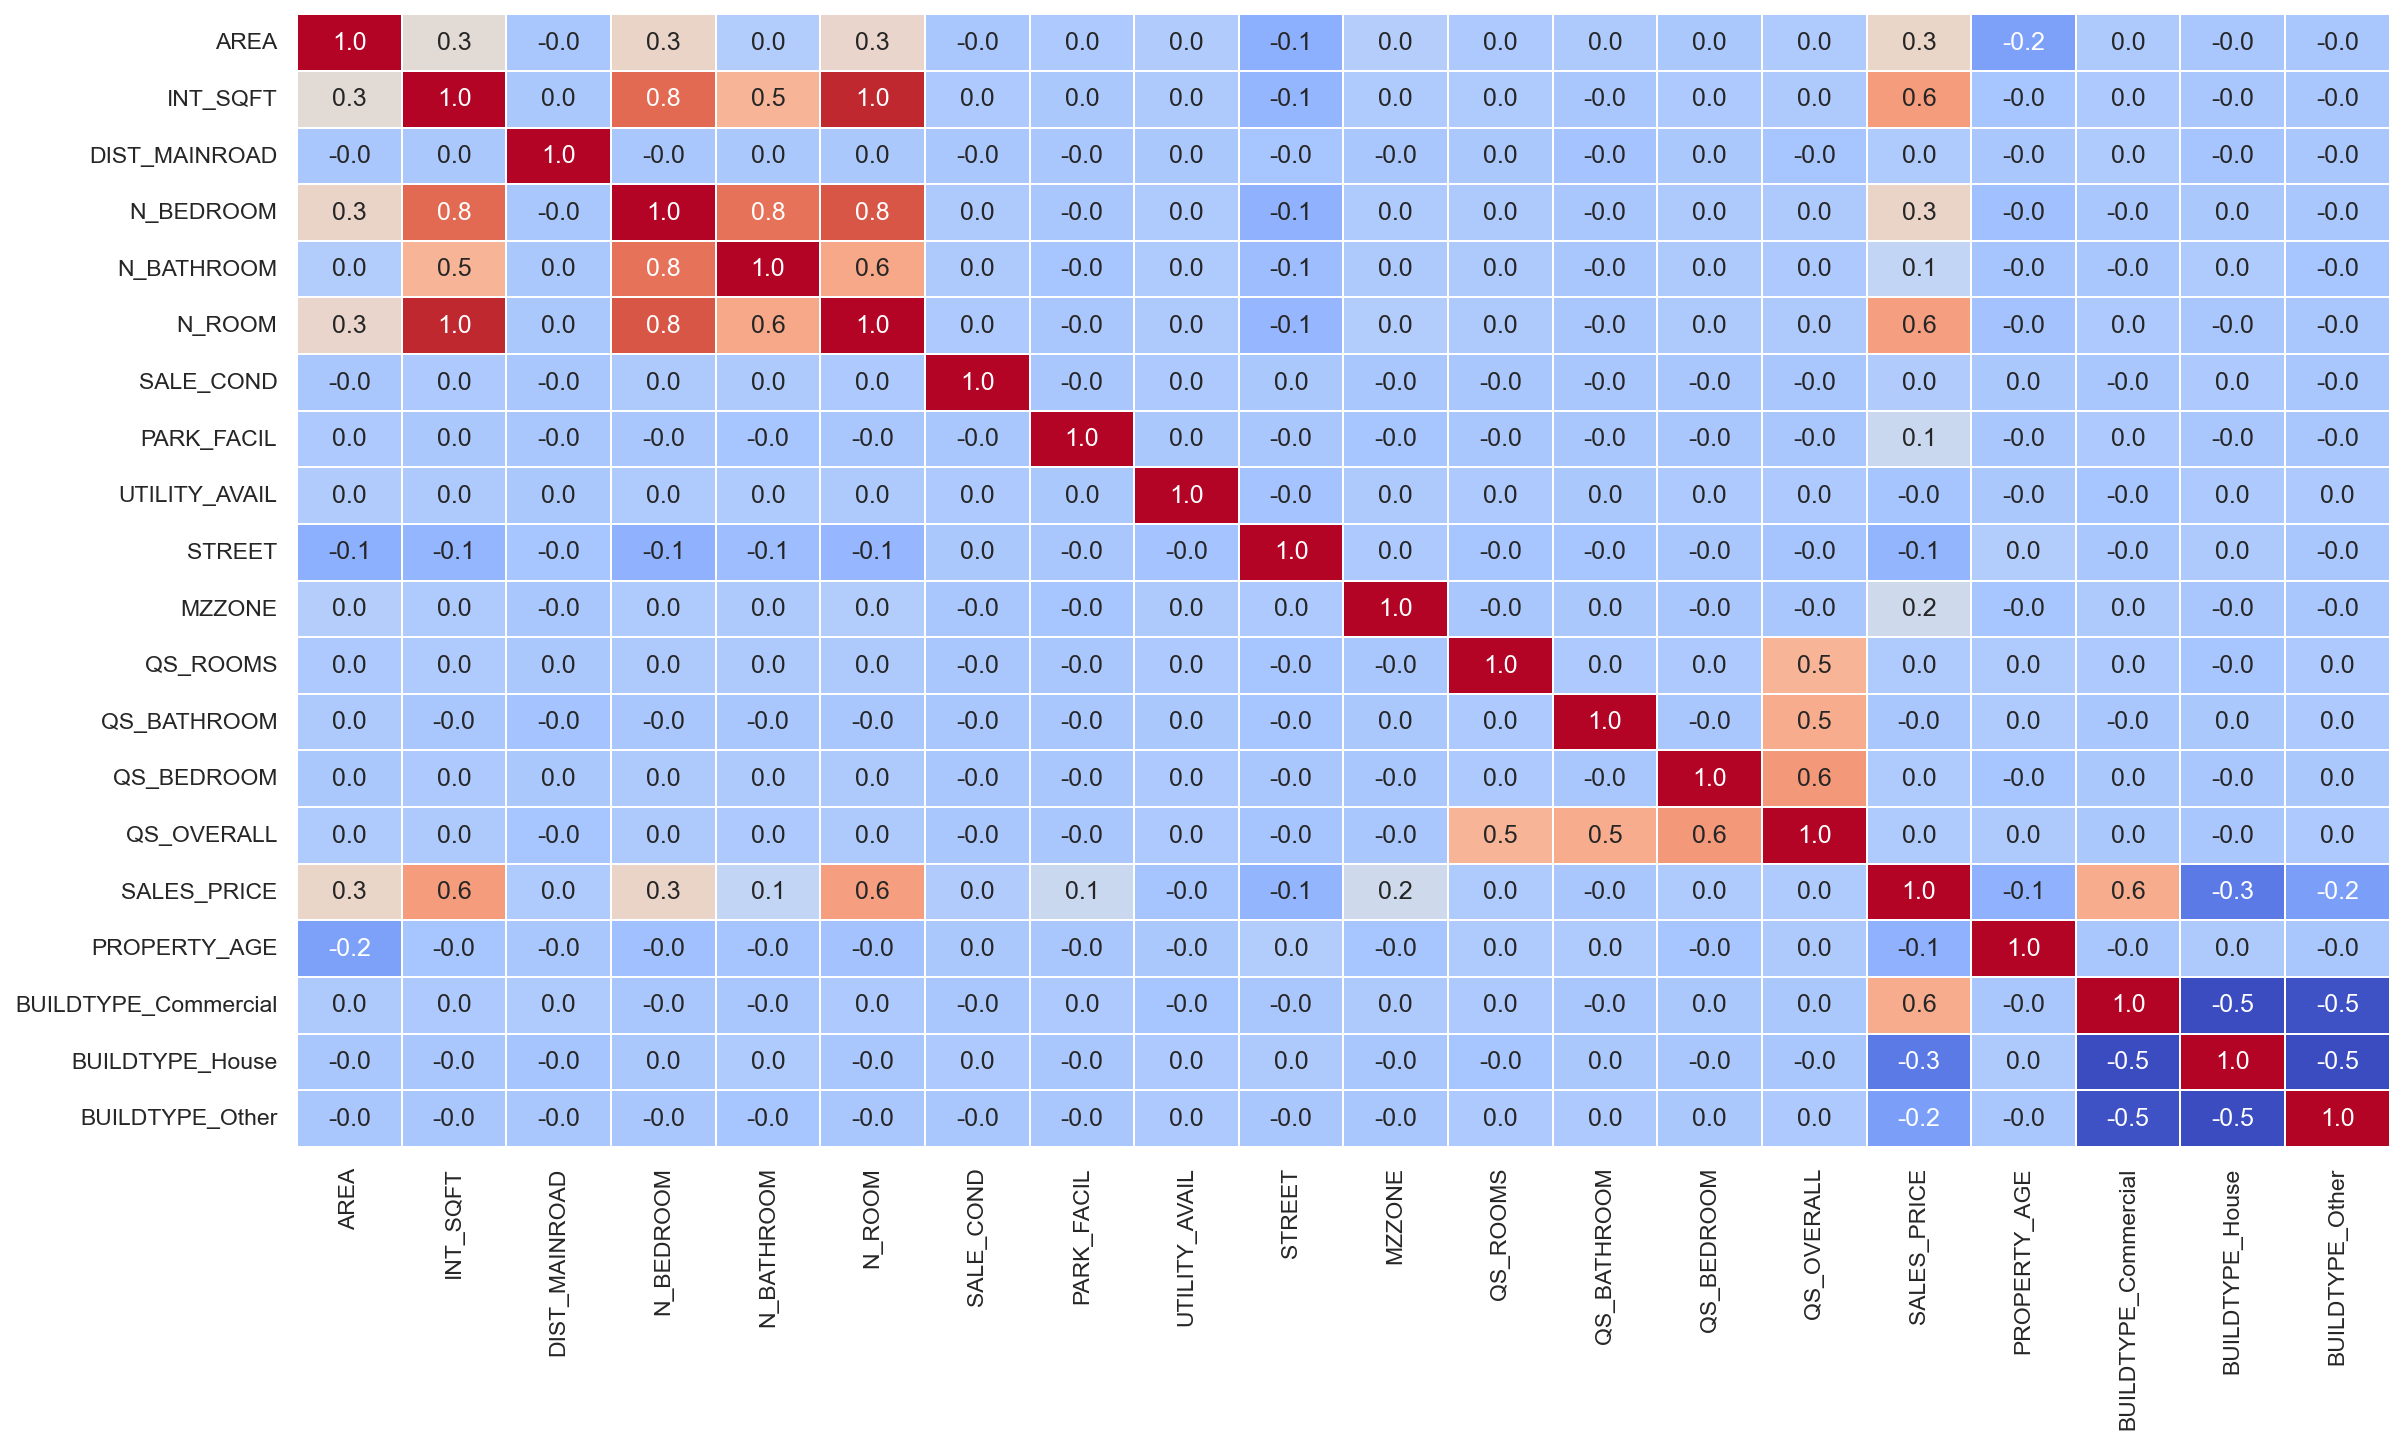

In [42]:
plt.figure(figsize=(18,10), dpi=150)
sns.heatmap(df.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm')

Interpretation
- Good correlation between some columns of our data which are seen in reddish colour.

In [43]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',
       'SALES_PRICE', 'PROPERTY_AGE', 'BUILDTYPE_Commercial',
       'BUILDTYPE_House', 'BUILDTYPE_Other'],
      dtype='object')

In [44]:
#Removing unwanted columns

df = df.copy()

df.drop(['DIST_MAINROAD','QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM','QS_OVERALL'],axis=1, inplace=True)


In [45]:
df.head(5)

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,PROPERTY_AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Other
0,1,1004,1,1,3,1,1,1,1,1,7600000,44,1,0,0
1,2,1986,2,1,5,1,0,1,2,2,21717770,11,1,0,0
2,3,909,1,1,3,1,1,2,2,3,13159200,20,1,0,0
3,4,1855,3,2,5,2,0,3,1,4,9630290,22,0,0,1
4,1,1226,1,1,3,1,1,1,2,5,7406250,30,0,0,1


In [46]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'SALES_PRICE',
       'PROPERTY_AGE', 'BUILDTYPE_Commercial', 'BUILDTYPE_House',
       'BUILDTYPE_Other'],
      dtype='object')

In [47]:
input_cols = ['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM','SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE','PROPERTY_AGE', 'BUILDTYPE_Commercial', 'BUILDTYPE_House','BUILDTYPE_Other']

In [48]:
target_col = ['SALES_PRICE']

In [49]:
input1 = df[input_cols].copy()
target = df[target_col].copy()

# Splitting the data for training and testing

In [50]:
X_train,X_test,y_train,y_test = train_test_split(input1,target,test_size=0.2, random_state = 7)

# Scaling

In [51]:
scaler = StandardScaler()
X_train =  scaler.fit_transform(X_train,y_train)
X_test = scaler.transform(X_test)

In [52]:
X_train

array([[ 0.12566653,  1.02006982,  1.6890076 , ..., -0.6985445 ,
         1.37949692, -0.69798724],
       [ 0.67625632, -1.31946969, -0.79814575, ..., -0.6985445 ,
        -0.72490195,  1.43269094],
       [ 0.67625632, -1.07170215, -0.79814575, ..., -0.6985445 ,
         1.37949692, -0.69798724],
       ...,
       [ 0.12566653,  0.71310119,  0.44543093, ...,  1.43154803,
        -0.72490195, -0.69798724],
       [ 1.2268461 ,  1.16039834,  1.6890076 , ..., -0.6985445 ,
        -0.72490195,  1.43269094],
       [-0.97551305,  1.31388266,  0.44543093, ..., -0.6985445 ,
         1.37949692, -0.69798724]])

# Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)



LinearRegression()

In [54]:
y_pred = lr.predict(X_test)

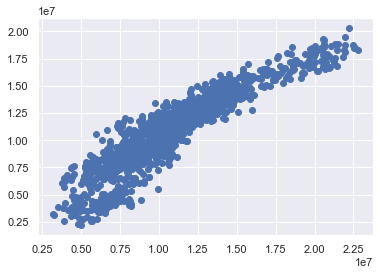

In [55]:
plt.scatter(y_test,y_pred)

In [56]:
c = lr.intercept_

In [57]:
m = lr.coef_

In [58]:
print('The Linear Regression is : y = ',m,'X+',c)

The Linear Regression is : y =  [[ 5.95453661e+05  1.29495953e+06 -2.06553749e+06 -2.20265008e+05
   2.63935737e+06  9.82958351e+04  5.00827581e+05 -1.19093443e+05
  -1.86187300e+05  5.09569767e+05 -2.93499120e+05  1.29668803e+19
   1.31251995e+19  1.29633161e+19]] X+ [10917036.3709309]


In [59]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.8526913394726998


# K Nearest Neighbor (KNN)

In [60]:
knn = KNeighborsRegressor(2)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)
y_pred = knn.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.8970262098430206


In [61]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
    knn = KNeighborsRegressor(i)
    knn.fit(X_train,y_train)
    print("K value : ", i, "train score : ", knn.score(X_train,y_train),"cv score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10)))
    

K value :  1 train score :  1.0 cv score :  0.8723176966178412
K value :  2 train score :  0.969888293074856 cv score :  0.8961609090667461
K value :  3 train score :  0.9554415130029091 cv score :  0.8995142028191001
K value :  4 train score :  0.9458596345031256 cv score :  0.8963431474264713
K value :  5 train score :  0.9373184618777854 cv score :  0.8939701398737399
K value :  6 train score :  0.9301806850581135 cv score :  0.889735880086665
K value :  7 train score :  0.9238722487114643 cv score :  0.8857720514451616
K value :  8 train score :  0.9176466828470656 cv score :  0.8811958752366807
K value :  9 train score :  0.9113367780554321 cv score :  0.876898522284751
K value :  10 train score :  0.9056862694386331 cv score :  0.8728325935092398
K value :  20 train score :  0.8669632200592841 cv score :  0.8436204318185471
K value :  50 train score :  0.8197881078899507 cv score :  0.80545513381087


Best value of K which has highest cross validation(K=3 has the highest cross val score)

# Decision Tree

In [62]:
dt = DecisionTreeRegressor() #'dt' with a maximum depth 
dt.fit(X_train,y_train) #fit the training set

y_pred = dt.predict(X_test)
print('R2- SCORE :', metrics.r2_score(y_test,y_pred))

R2- SCORE : 0.9635401154659397


# Random Forest

In [63]:
rf = RandomForestRegressor(n_estimators=100,max_depth=15,max_features='sqrt')

In [64]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print('R2- SCORE :', metrics.r2_score(y_test,y_pred))

R2- SCORE : 0.9773036146863886


# XGBoost

In [65]:
import warnings
warnings.filterwarnings('ignore')


In [66]:
!pip3 install xgboost

In [67]:
import xgboost as xgb

In [68]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
    model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
    model.fit(X_train, y_train)
    model.score(X_test,y_test)
    print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.3313403992449391  Cross-Val score :  -0.34461006445517633
Learning rate :  0.02  Train score :  0.7931786436062238  Cross-Val score :  0.7856077992036049
Learning rate :  0.03  Train score :  0.9582870011724096  Cross-Val score :  0.9522909221803413
Learning rate :  0.04  Train score :  0.9858294464046973  Cross-Val score :  0.9805769238298838
Learning rate :  0.05  Train score :  0.9922530719709732  Cross-Val score :  0.9874553272883139
Learning rate :  0.06  Train score :  0.9946513785362572  Cross-Val score :  0.9902392891083658
Learning rate :  0.07  Train score :  0.996250731619151  Cross-Val score :  0.991998560617351
Learning rate :  0.08  Train score :  0.9969370064544529  Cross-Val score :  0.9930100692498719
Learning rate :  0.09  Train score :  0.9974542399899874  Cross-Val score :  0.9939492569526346
Learning rate :  0.1  Train score :  0.9978869963749235  Cross-Val score :  0.9942961017102103
Learning rate :  0.11  Train score :  0.

In [69]:
model = xgb.XGBRegressor(learning_rate = 0.2, n_estimators=100)
model.fit(X_train,y_train) #train the model
model.score(X_test, y_test)
y_pred = model.predict(X_test)
print('R2- SCORE :', metrics.r2_score(y_test,y_pred))

R2- SCORE : 0.995586379974859


Interpretation:-

Here after training all kinds of model

Linear Regression - R2- SCORE: 0.8526913394726998

K Nearest Neighbor (KNN) - R2- SCORE: 0.8970262098430206

Decision Tree - R2- SCORE : 0.9644270070556091

Random Forest - R2- SCORE : 0.9773036146863886

XGBoost - R2- SCORE : 0.995586379974859








Conclusion : Best model is XGBoost which has the best R2 Score - 0.995586379974859